# Worksheet

## Matrix Approximation

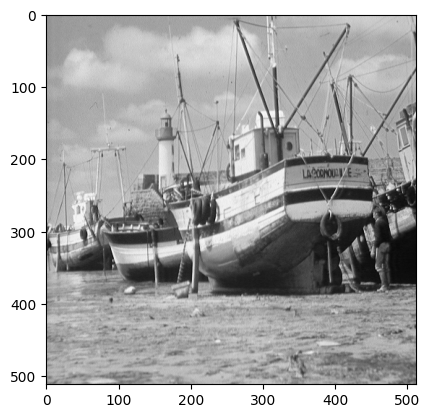

In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

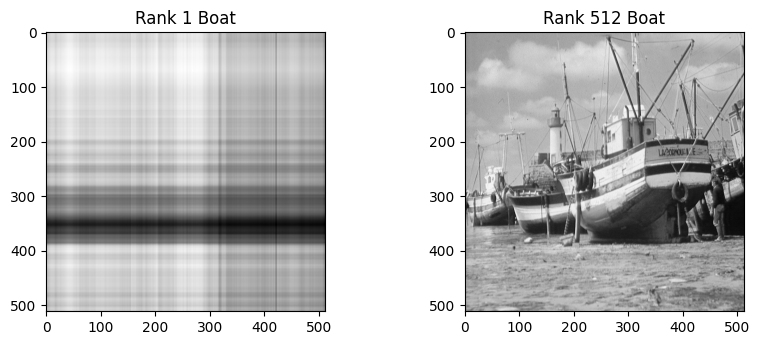

In [ ]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
RANK = 1
scopy = s.copy()
scopy[RANK:] = 0.0

boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title(f'Rank {RANK} Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

Let's generate a dataset to see SVD from a different perspective.

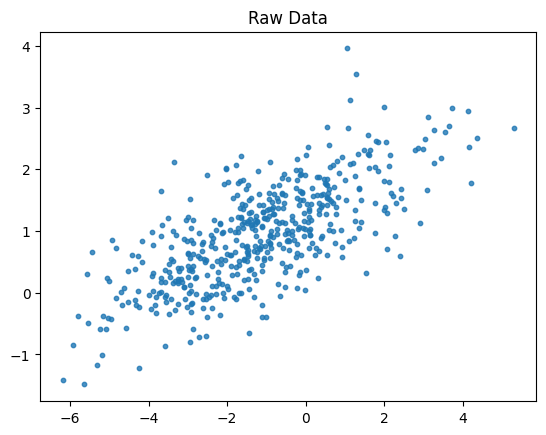

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(mean=[-1, 1], cov=[[0.1, 0.6], [2., .6]], samples=500):
    np.random.seed(2)
    return np.random.randn(samples, 2) @ cov + mean

X = generate_data()
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

Applying SVD we get the following approximations

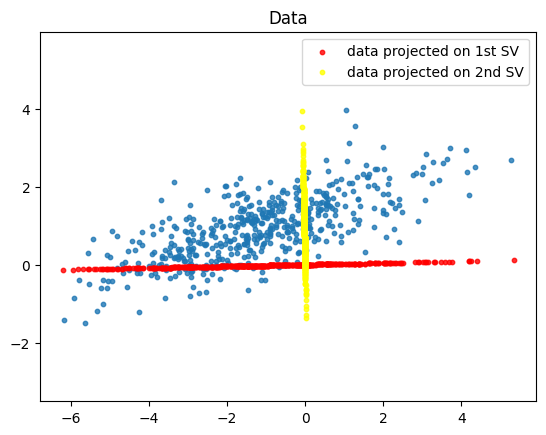

In [52]:
u,s,vt=np.linalg.svd(X, full_matrices=False)
scopy0 = s.copy()
scopy1 = s.copy()
scopy0[1] = 0.0
scopy1[0] = 0.0
approx0 = u.dot(np.diag(scopy0)).dot(vt)
approx1 = u.dot(np.diag(scopy1)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.scatter(approx0[:, 0] , approx0[:, 1], s=10, alpha=0.8, color="red", label="data projected on 1st SV")
plt.scatter(approx1[:, 0] , approx1[:, 1], s=10, alpha=0.8, color="yellow", label="data projected on 2nd SV")
plt.axis('equal')
plt.legend()
plt.title("Data")
plt.show()

What happens if one feature is farther from 0?

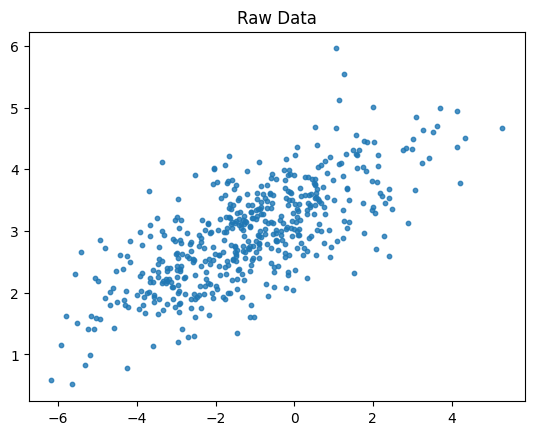

In [53]:
X = generate_data(mean=[-1, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

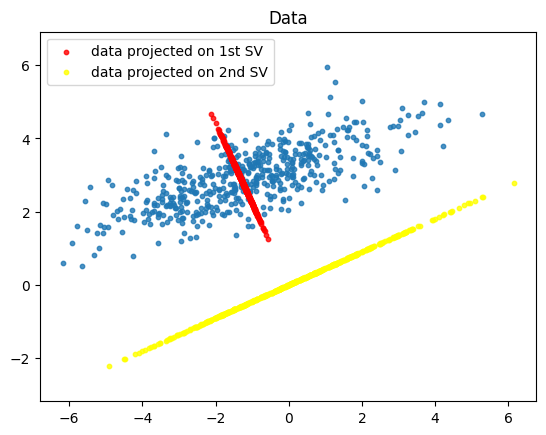

In [54]:
u,s,vt=np.linalg.svd(X, full_matrices=False)
scopy0 = s.copy()
scopy1 = s.copy()
scopy0[1:] = 0.0
scopy1[:1] = 0.0
approx0 = u.dot(np.diag(scopy0)).dot(vt)
approx1 = u.dot(np.diag(scopy1)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.scatter(approx0[:, 0] , approx0[:, 1], s=10, alpha=0.8, color="red", label="data projected on 1st SV")
plt.scatter(approx1[:, 0] , approx1[:, 1], s=10, alpha=0.8, color="yellow", label="data projected on 2nd SV")
plt.axis('equal')
plt.legend()
plt.title("Data")
plt.show()

Weird... The "best" approximation is clearly not correct... Seems like the higher mean is influencing the outcome. We don't want that.

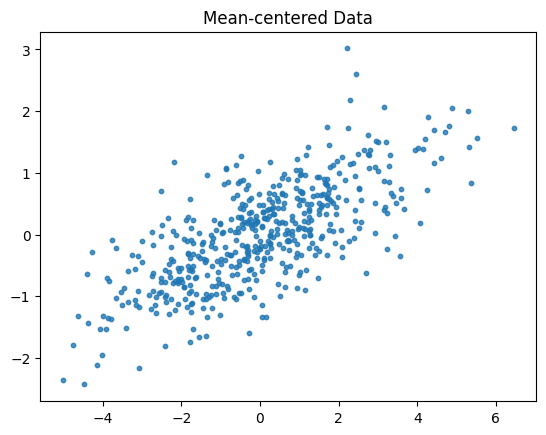

In [55]:
X = X - np.mean(X, axis=0)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Mean-centered Data")
plt.show()

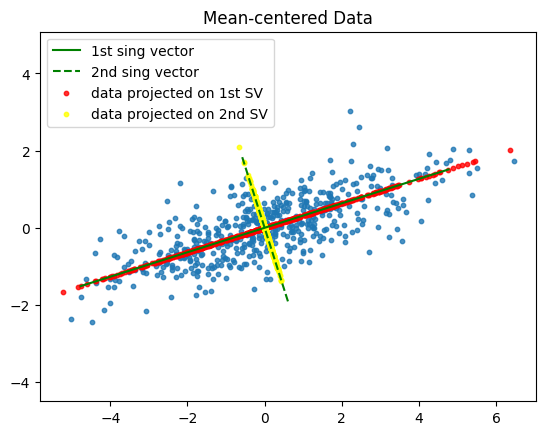

In [56]:
u,s,vt=np.linalg.svd(X, full_matrices=False)
scopy0 = s.copy()
scopy1 = s.copy()
scopy0[1:] = 0.0
scopy1[:1] = 0.0
approx0 = u.dot(np.diag(scopy0)).dot(vt)
approx1 = u.dot(np.diag(scopy1)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
sv1 = np.array([[-5],[5]]) @ vt[[0],:]
sv2 = np.array([[-2],[2]]) @ vt[[1],:]
plt.plot(sv1[:,0], sv1[:,1], 'g-', label="1st sing vector")
plt.plot(sv2[:,0], sv2[:,1], 'g--', label="2nd sing vector")
plt.scatter(approx0[:, 0] , approx0[:, 1], s=10, alpha=0.8, color="red", label="data projected on 1st SV")
plt.scatter(approx1[:, 0] , approx1[:, 1], s=10, alpha=0.8, color="yellow", label="data projected on 2nd SV")
plt.axis('equal')
plt.legend()
plt.title("Mean-centered Data")
plt.show()

That's more like it! What if the range / variance is much higher in one feature than the other?

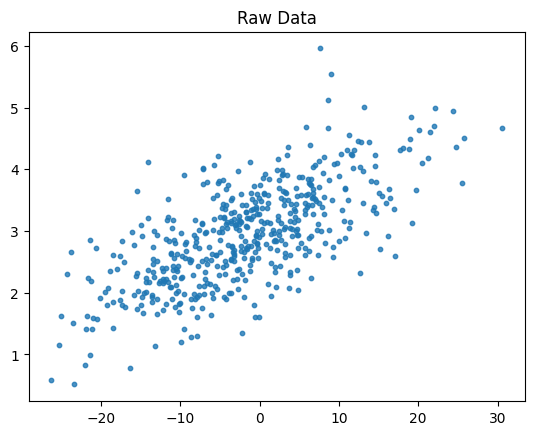

In [57]:
X = generate_data([-1, 3], cov=[[0.1, 0.6], [10., .6]])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

it's sneaky because the axes aren't equal, let's fix that.

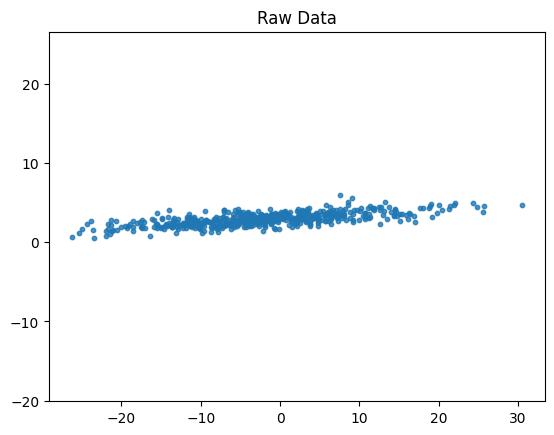

In [58]:
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.axis('equal')
plt.title("Raw Data")
plt.show()

So we expect the first singular vector to align mostly with the first feature.

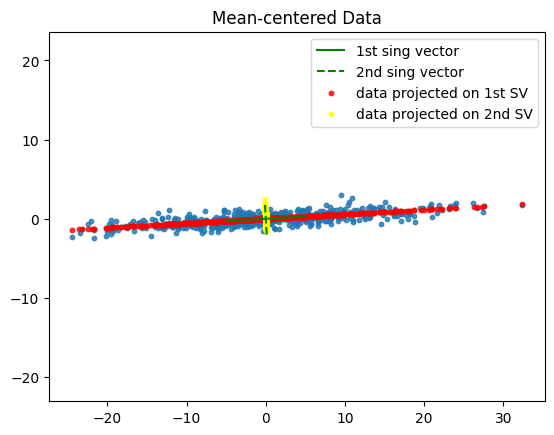

In [59]:
X = X - np.mean(X, axis=0)
u,s,vt=np.linalg.svd(X, full_matrices=False)
scopy0 = s.copy()
scopy1 = s.copy()
scopy0[1:] = 0.0
scopy1[:1] = 0.0
approx0 = u.dot(np.diag(scopy0)).dot(vt)
approx1 = u.dot(np.diag(scopy1)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
sv1 = np.array([[-5],[5]]) @ vt[[0],:]
sv2 = np.array([[-2],[2]]) @ vt[[1],:]
plt.plot(sv1[:,0], sv1[:,1], 'g-', label="1st sing vector")
plt.plot(sv2[:,0], sv2[:,1], 'g--', label="2nd sing vector")
plt.scatter(approx0[:, 0] , approx0[:, 1], s=10, alpha=0.8, color="red", label="data projected on 1st SV")
plt.scatter(approx1[:, 0] , approx1[:, 1], s=10, alpha=0.8, color="yellow", label="data projected on 2nd SV")
plt.axis('equal')
plt.legend()
plt.title("Mean-centered Data")
plt.show()

Is this what we want? Don't we want to normalize things so that the range of values is simiar?

[[100.89701737   5.67778468]
 [  5.67778468   0.67405252]]
After normalization
[[1.00200401 0.68986219]
 [0.68986219 1.00200401]]


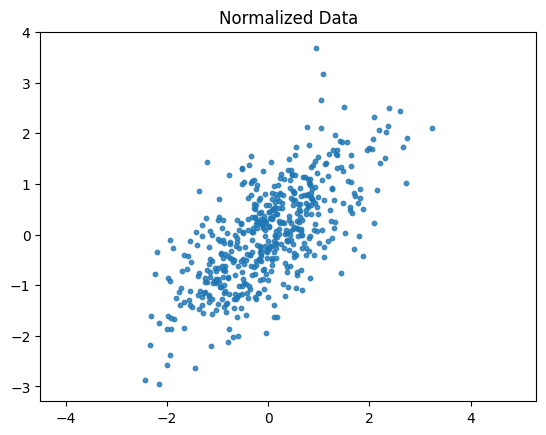

In [76]:
X = generate_data([-1, 3], cov=[[0.1, 0.6], [10., .6]])
cov_before = np.cov(X, rowvar=False)
print(cov_before)
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
print("After normalization")
print(np.cov(X, rowvar=False))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Normalized Data")
plt.axis('equal')
plt.show()

[29.05582961 12.48033517]


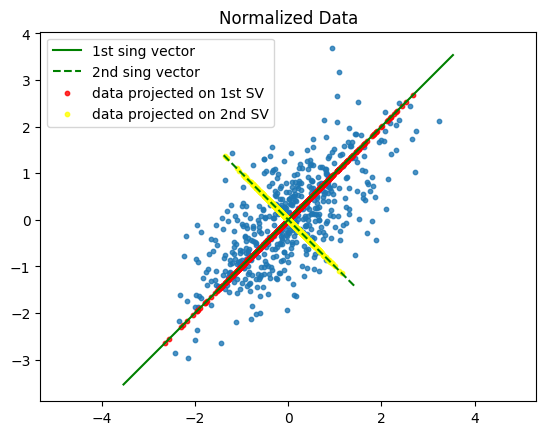

In [77]:
u,s,vt=np.linalg.svd(X, full_matrices=False)
print(s)
scopy0 = s.copy()
scopy1 = s.copy()
scopy0[1:] = 0.0
scopy1[:1] = 0.0
approx0 = u.dot(np.diag(scopy0)).dot(vt)
approx1 = u.dot(np.diag(scopy1)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
sv1 = np.array([[-5],[5]]) @ vt[[0],:]
sv2 = np.array([[-2],[2]]) @ vt[[1],:]
plt.plot(sv1[:,0], sv1[:,1], 'g-', label="1st sing vector")
plt.plot(sv2[:,0], sv2[:,1], 'g--', label="2nd sing vector")
plt.scatter(approx0[:, 0] , approx0[:, 1], s=10, alpha=0.8, color="red", label="data projected on 1st SV")
plt.scatter(approx1[:, 0] , approx1[:, 1], s=10, alpha=0.8, color="yellow", label="data projected on 2nd SV")
plt.axis('equal')
plt.legend()
plt.title("Normalized Data")
plt.show()

huh... so even if the individual variances are 1, it finds the direction of most variance which is in a direction that's a combination of both features. You can see that each principal component isn't particularly aligned with one fefature or the other like it was in the previous example (not normalized but just mean-centered). The columns of `V^T` represent the contribution of each feature toward a singular vector.

Looking at the columns of `V^T` we can see that the contribution is exactly the same for each feature for each of the singular vectors.

In [78]:
print(vt)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


Let's see how that compares when things aren't normalized. We would expect that since the variance of the first feature is the highest, the contribution of the first feature to the first singular vector will be higher than the contribution of the second feature.

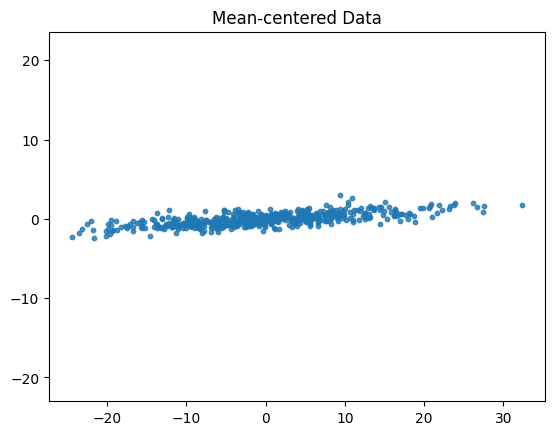

In [79]:
X = generate_data([-1, 3], cov=[[0.1, 0.6], [10., .6]])
X = X - np.mean(X, axis=0)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Mean-centered Data")
plt.axis('equal')
plt.show()

[224.73897252  13.2799889 ]


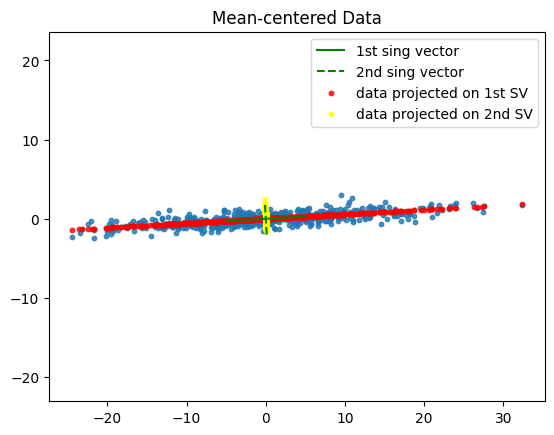

In [80]:
u,s,vt=np.linalg.svd(X, full_matrices=False)
print(s)
scopy0 = s.copy()
scopy1 = s.copy()
scopy0[1:] = 0.0
scopy1[:1] = 0.0
approx0 = u.dot(np.diag(scopy0)).dot(vt)
approx1 = u.dot(np.diag(scopy1)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
sv1 = np.array([[-5],[5]]) @ vt[[0],:]
sv2 = np.array([[-2],[2]]) @ vt[[1],:]
plt.plot(sv1[:,0], sv1[:,1], 'g-', label="1st sing vector")
plt.plot(sv2[:,0], sv2[:,1], 'g--', label="2nd sing vector")
plt.scatter(approx0[:, 0] , approx0[:, 1], s=10, alpha=0.8, color="red", label="data projected on 1st SV")
plt.scatter(approx1[:, 0] , approx1[:, 1], s=10, alpha=0.8, color="yellow", label="data projected on 2nd SV")
plt.axis('equal')
plt.legend()
plt.title("Mean-centered Data")
plt.show()

In [81]:
print(vt)

[[-0.99840932 -0.05638105]
 [-0.05638105  0.99840932]]


So when do we normalize? when do we mean-center?

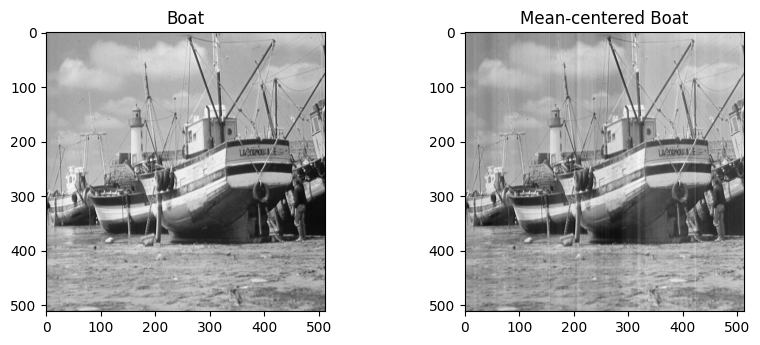

In [89]:
mean_centered_boat = boat - np.mean(boat, axis=0)
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Boat')
plt.subplot(1,2,2)
plt.imshow(mean_centered_boat, cmap = cm.Greys_r)
plt.title('Mean-centered Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

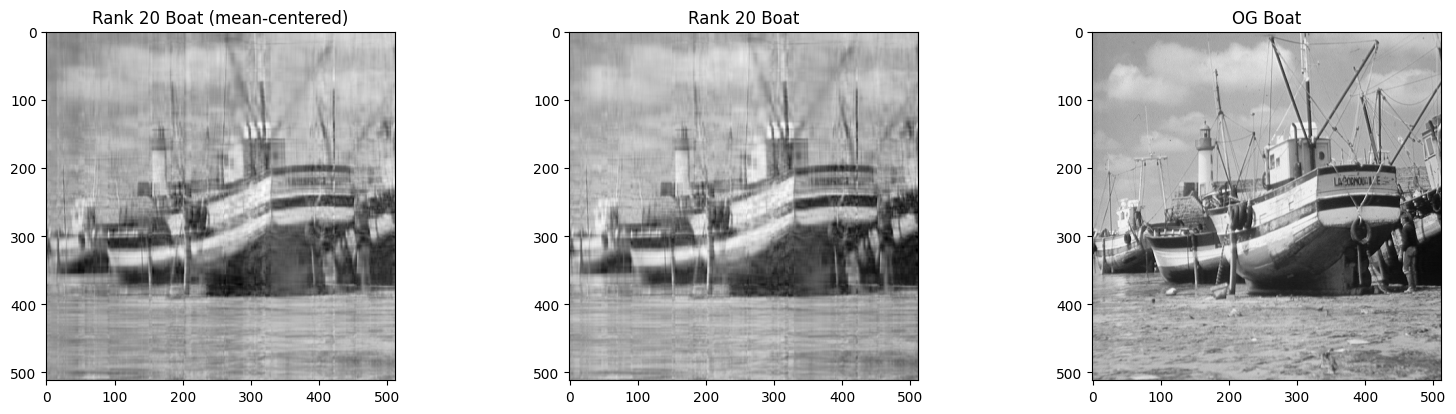

In [95]:
u,s,vt=np.linalg.svd(mean_centered_boat,full_matrices=False)
RANK = 20
scopy = s.copy()
scopy[RANK:] = 0.0
mc_boat_app = u.dot(np.diag(scopy)).dot(vt)

u,s,vt=np.linalg.svd(boat,full_matrices=False)
scopy = s.copy()
scopy[RANK:] = 0.0
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(mc_boat_app, cmap = cm.Greys_r)
plt.title(f'Rank {RANK} Boat (mean-centered)')
plt.subplot(1,3,2)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title(f'Rank {RANK} Boat')
plt.subplot(1,3,3)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('OG Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

Maybe the means are just very similar for each column. Let's check

In [111]:
means = np.mean(boat, axis=0)
print(means)
print(np.mean(means))
print(np.std(means))

[119.79492188 134.73632812 131.32617188 131.33984375 133.5859375
 136.12304688 137.97851562 139.9921875  142.2421875  143.27148438
 144.05664062 143.99609375 143.50390625 143.41015625 144.24023438
 141.21679688 135.78710938 132.52148438 133.09765625 136.37695312
 138.87109375 140.83398438 141.95898438 143.12304688 144.19335938
 141.77148438 141.921875   141.08984375 144.45898438 144.69921875
 145.87890625 145.80664062 146.12304688 147.13671875 148.48242188
 149.828125   150.35742188 151.71875    153.36328125 154.65429688
 155.94140625 156.33203125 155.22070312 155.74609375 156.15234375
 156.13476562 155.68554688 153.38671875 152.52539062 149.90039062
 146.97265625 146.0390625  144.72070312 144.25585938 143.58789062
 141.87695312 141.26757812 144.5859375  146.484375   145.5234375
 140.7734375  138.21289062 136.73046875 136.39257812 136.56835938
 138.671875   137.41796875 135.1953125  137.5625     138.47460938
 137.03710938 134.44140625 135.10742188 132.58398438 133.92382812
 135.5371093

What about normalizing?

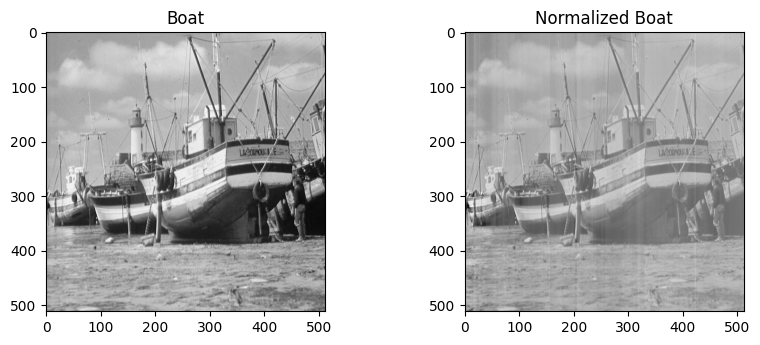

In [112]:
norm_boat = (boat - np.mean(boat, axis=0)) / np.std(boat, axis=0)
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Boat')
plt.subplot(1,2,2)
plt.imshow(norm_boat, cmap = cm.Greys_r)
plt.title('Normalized Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

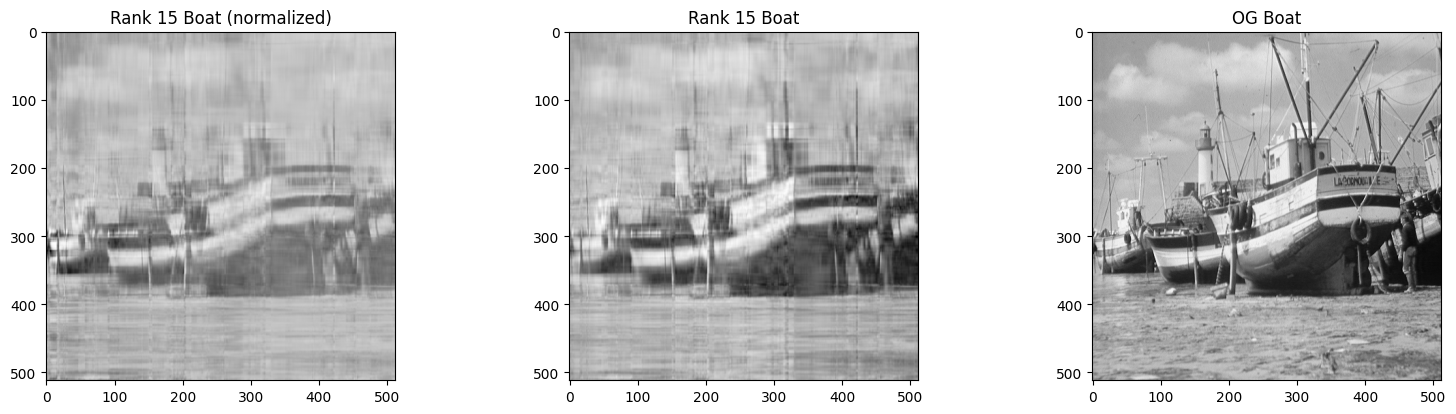

In [115]:
u,s,vt=np.linalg.svd(norm_boat,full_matrices=False)
RANK = 15
scopy = s.copy()
scopy[RANK:] = 0.0
mc_boat_app = u.dot(np.diag(scopy)).dot(vt)

u,s,vt=np.linalg.svd(boat,full_matrices=False)
scopy = s.copy()
scopy[RANK:] = 0.0
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(mc_boat_app, cmap = cm.Greys_r)
plt.title(f'Rank {RANK} Boat (normalized)')
plt.subplot(1,3,2)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title(f'Rank {RANK} Boat')
plt.subplot(1,3,3)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('OG Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

Things that are accentuated in the orginal image are lost through normalization... Let's try an image where there are more intense variations in color per column

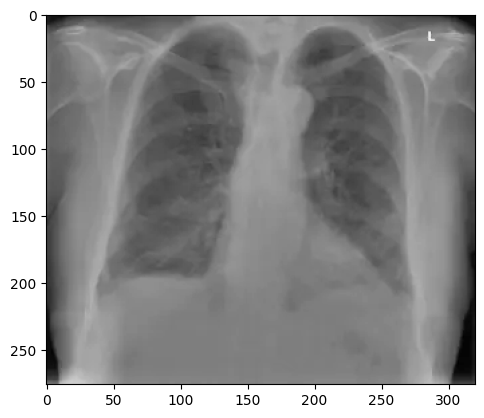

In [108]:
import matplotlib.image as mpimg
rgb_img = mpimg.imread('./image.png')
img = np.dot(rgb_img[..., :3], [0.2989, 0.5870, 0.1140])
plt.imshow(img, cmap= cm.Greys_r)

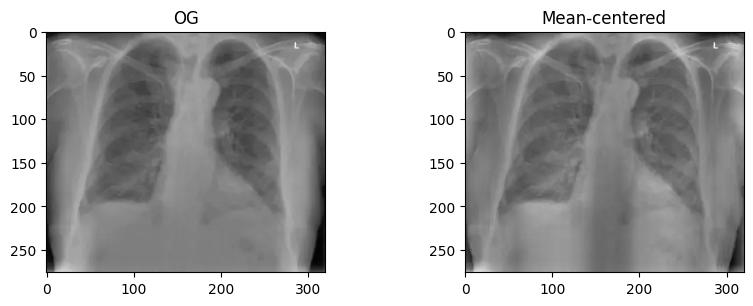

In [109]:
mean_centered_img = img - np.mean(img, axis=0)
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(img, cmap = cm.Greys_r)
plt.title('OG')
plt.subplot(1,2,2)
plt.imshow(mean_centered_img, cmap = cm.Greys_r)
plt.title('Mean-centered')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

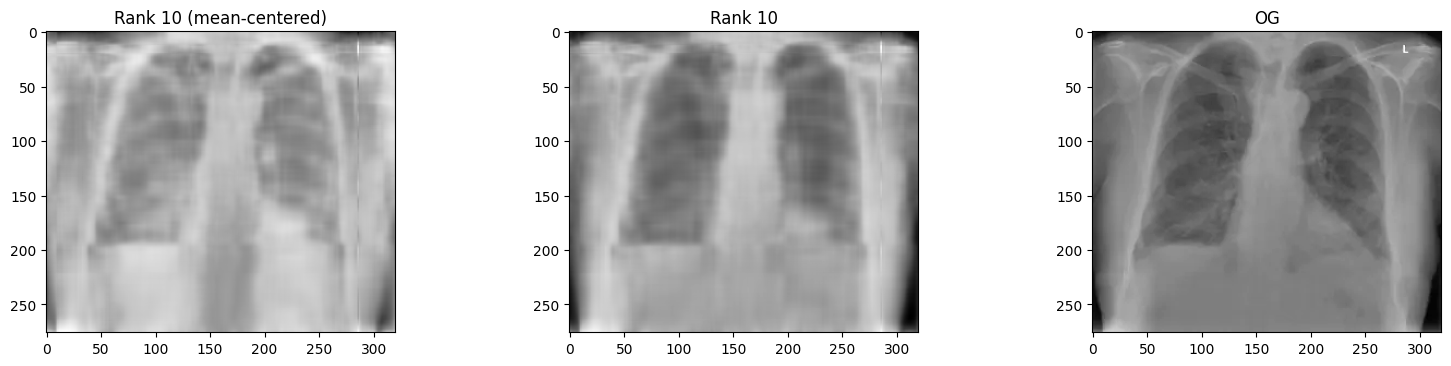

In [110]:
u,s,vt=np.linalg.svd(mean_centered_img,full_matrices=False)
RANK = 10
scopy = s.copy()
scopy[RANK:] = 0.0
mc_img_app = u.dot(np.diag(scopy)).dot(vt)

u,s,vt=np.linalg.svd(img,full_matrices=False)
scopy = s.copy()
scopy[RANK:] = 0.0
img_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(mc_img_app, cmap = cm.Greys_r)
plt.title(f'Rank {RANK} (mean-centered)')
plt.subplot(1,3,2)
plt.imshow(img_app, cmap = cm.Greys_r)
plt.title(f'Rank {RANK}')
plt.subplot(1,3,3)
plt.imshow(img, cmap = cm.Greys_r)
plt.title('OG')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

# Dimensionality Reduction

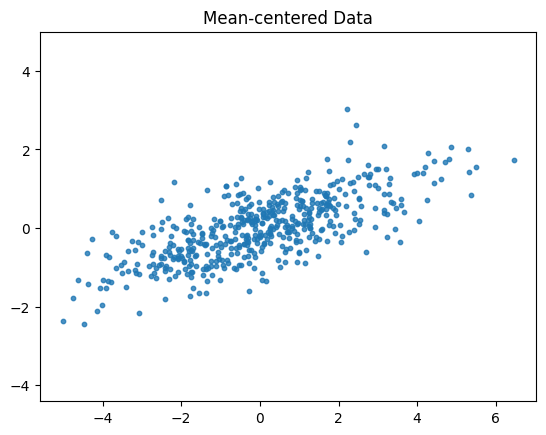

In [83]:
X = generate_data([-1, 3], cov=[[0.1, 0.6], [2., .6]])
X = X - np.mean(X, axis=0)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Mean-centered Data")
plt.axis('equal')
plt.show()

What does `U` look like?

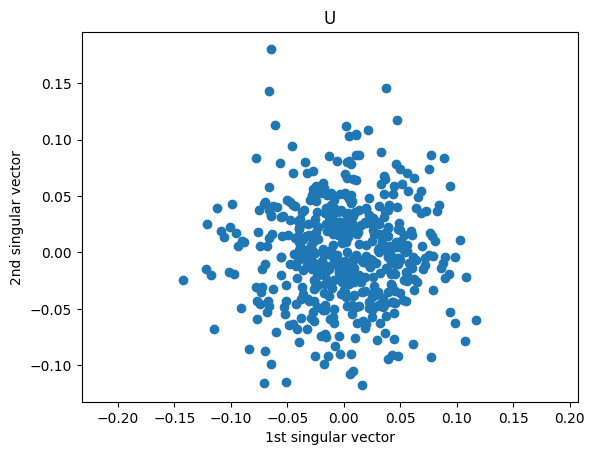

In [87]:
u,s,vt=np.linalg.svd(X, full_matrices=False)
orthonormal_X = u
plt.axis('equal')
plt.scatter(orthonormal_X[:,0], orthonormal_X[:,1])
plt.xlabel("1st singular vector")
plt.ylabel("2nd singular vector")
plt.title("U")
plt.axis('equal')
plt.show()

ALl correlation has been removed. And all features are unit length so their contribution is the same in every coordinate direction. Not very useful but interesting...

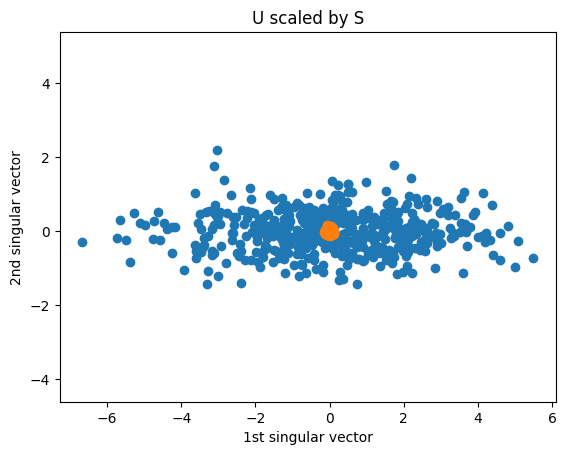

In [88]:
orthonormal_X = u
shifted_X = u.dot(np.diag(s))
plt.axis('equal')
plt.scatter(shifted_X[:,0], shifted_X[:,1])
plt.scatter(orthonormal_X[:,0], orthonormal_X[:,1])
plt.xlabel("1st singular vector")
plt.ylabel("2nd singular vector")
plt.title("U scaled by S")
plt.show()

This is the data represented in the singular vector space (each singular vector is a basis vector) and the the data is scaled with the respective variance in each coordinate direction but still no correlation.

## The difference between dim-reduction and approximation

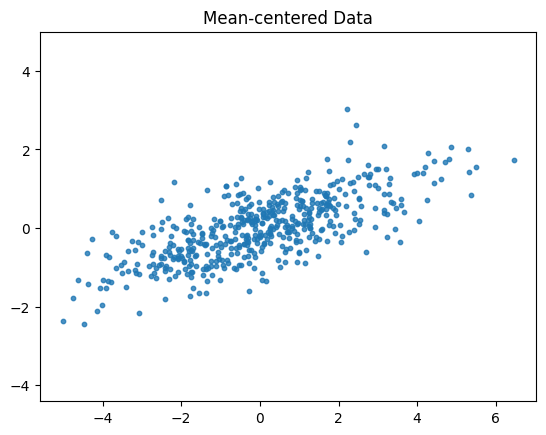

In [125]:
X = generate_data([-1, 3], cov=[[0.1, 0.6], [2., .6]])
X = X - np.mean(X, axis=0)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Mean-centered Data")
plt.axis('equal')
plt.show()

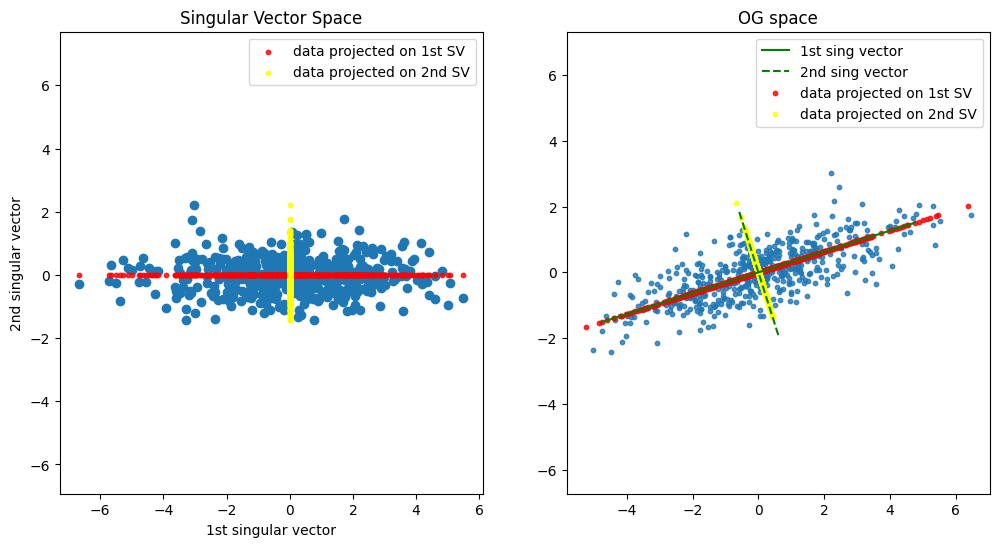

In [128]:
u,s,vt=np.linalg.svd(X, full_matrices=False)
shifted_X = u.dot(np.diag(s))
scopy0 = s.copy()
scopy1 = s.copy()
scopy0[1:] = 0.0
scopy1[:1] = 0.0
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.axis('equal')
plt.scatter(shifted_X[:,0], shifted_X[:,1])
approx0 = u.dot(np.diag(scopy0))
approx1 = u.dot(np.diag(scopy1))
plt.scatter(approx0[:, 0] , approx0[:, 1], s=10, alpha=0.8, color="red", label="data projected on 1st SV")
plt.scatter(approx1[:, 0] , approx1[:, 1], s=10, alpha=0.8, color="yellow", label="data projected on 2nd SV")
plt.xlabel("1st singular vector")
plt.ylabel("2nd singular vector")
plt.title("Singular Vector Space")
plt.legend()
plt.subplot(1,2,2)
approx0 = u.dot(np.diag(scopy0)).dot(vt)
approx1 = u.dot(np.diag(scopy1)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
sv1 = np.array([[-5],[5]]) @ vt[[0],:]
sv2 = np.array([[-2],[2]]) @ vt[[1],:]
plt.plot(sv1[:,0], sv1[:,1], 'g-', label="1st sing vector")
plt.plot(sv2[:,0], sv2[:,1], 'g--', label="2nd sing vector")
plt.scatter(approx0[:, 0] , approx0[:, 1], s=10, alpha=0.8, color="red", label="data projected on 1st SV")
plt.scatter(approx1[:, 0] , approx1[:, 1], s=10, alpha=0.8, color="yellow", label="data projected on 2nd SV")
plt.axis('equal')
plt.legend()
plt.title("OG space")
plt.show()

what is the dimension of the red data set on the left?

What is the dimension of the red dataset on the right?

## Beyond Linearity

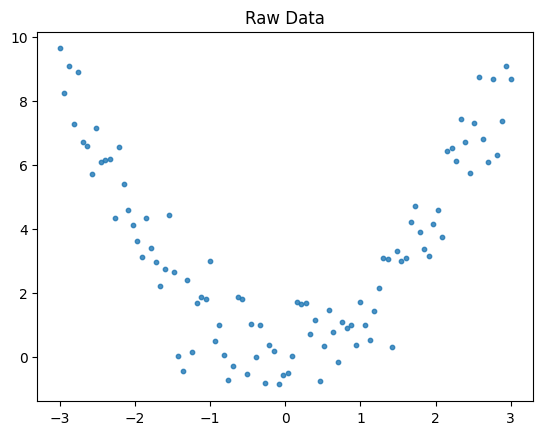

In [123]:
x = np.linspace(-3, 3, 100)
y = x**2 + np.random.normal(0, 1, size=x.shape)

X = np.column_stack([x, y])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

[28.88117369 17.47262062]


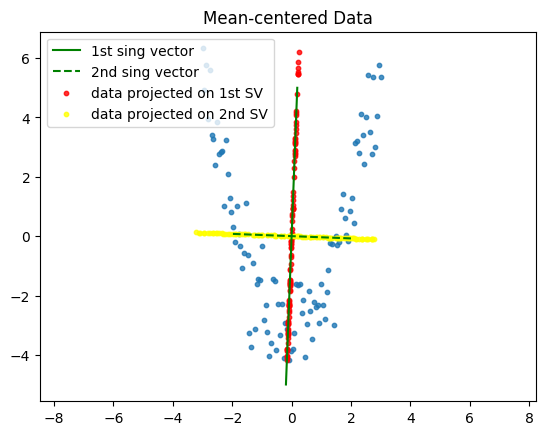

In [124]:
X = X - np.mean(X, axis=0)
u,s,vt=np.linalg.svd(X, full_matrices=False)
print(s)
scopy0 = s.copy()
scopy1 = s.copy()
scopy0[1:] = 0.0
scopy1[:1] = 0.0
approx0 = u.dot(np.diag(scopy0)).dot(vt)
approx1 = u.dot(np.diag(scopy1)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
sv1 = np.array([[-5],[5]]) @ vt[[0],:]
sv2 = np.array([[-2],[2]]) @ vt[[1],:]
plt.plot(sv1[:,0], sv1[:,1], 'g-', label="1st sing vector")
plt.plot(sv2[:,0], sv2[:,1], 'g--', label="2nd sing vector")
plt.scatter(approx0[:, 0] , approx0[:, 1], s=10, alpha=0.8, color="red", label="data projected on 1st SV")
plt.scatter(approx1[:, 0] , approx1[:, 1], s=10, alpha=0.8, color="yellow", label="data projected on 2nd SV")
plt.axis('equal')
plt.legend()
plt.title("Mean-centered Data")
plt.show()